## Table of Contents
1. Understanding Business Case
2. Variable Description
3. Data Understanding
4. Data Cleaning
5. Data Visualization
6. Building a regression model
7. Model evaluation
8. Model prediction

## 1. Understanding Business Problem

Our business case is to predict customer charges for an insurance company based on given variables. So that the company can decide how much they charge people correctly.

## 2. Variable Description

After understanding the business case, we need to know our variables before analyzing them. 
In this dataset, we have 7 variables including:
- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

You can download the dataset in Kaggle [here](https://www.kaggle.com/datasets/mirichoi0218/insurance?datasetId=13720&sortBy=voteCount)

## 3. Data Understanding

First of all, we need to import necessary libraries for analysis and making predictions. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

from sklearn.model_selection import train_test_split #to separate the dataset
from sklearn.linear_model import LinearRegression #Linear regression model 
from sklearn.metrics import mean_squared_error, r2_score #metric to evaluate the model 
import joblib #to save the model

import warnings # ignore warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
data = pd.read_csv("C://Users//Admin//Downloads//insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We see that we have 7 variables and 1338 observations for the dataset. Seems like there are no missing values in the data frame.

In [4]:
data.shape #returns a tuple that represents the dimensions of the data frame

(1338, 7)

In [5]:
list(data.columns)#check the variable names

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [6]:
data.describe() #generates descriptive statistics including count, mean, std, min, max as well as lower, 50(median) and upper percentiles.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.describe(include="O") #descriptive statistics for categorical data

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


 The most frequent value for sex is male and shown in the dataset 676 times.There are 4 unique regions in our dataset and the most frequent value is southeast and 364 times counted in the data. Most people are not smokers with a number of 1064 observations. 

## 4. Data Cleaning

In [8]:
data.isna().sum() #check null vallues

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values in this dataset

In [9]:
data[data.duplicated(keep="first")]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Dataset has only one duplicated observation.

In [10]:
data.drop_duplicates(keep="first", inplace=True)

In [11]:
data.shape

(1337, 7)

After cleaning process, the dataset has 7 columns and 1337 observations. 

## 5. Data Visualization

### 5.1 Univariate Analysis

**Univariate Analysis for numerical variables**

Get the visualization for the label: **charges**

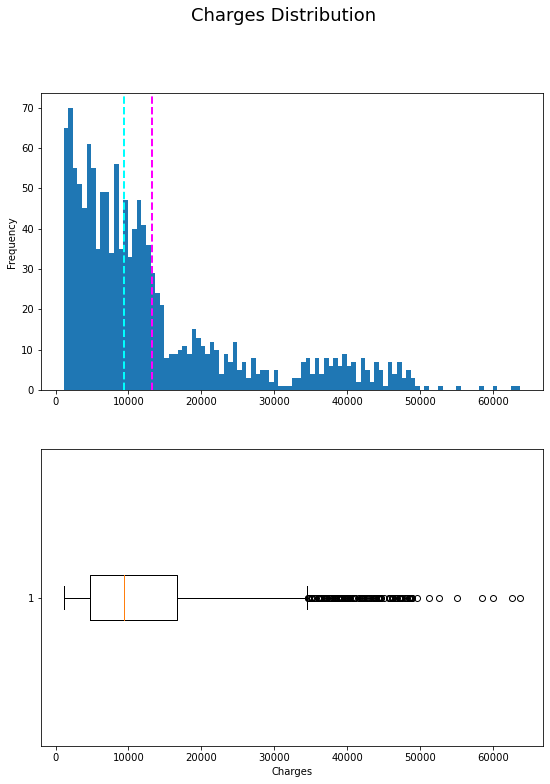

In [12]:
# Get the label column
label = data['charges']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Charges')

# Add a title to the Figure
fig.suptitle('Charges Distribution', size=18)

# Show the figure
fig.show()

We see that our data looks like the right skewed. Most of the charges are between 0 – 13000 dollars.
By using a boxplot, We can easily realize the outliers. 

A common way to remove outliers is to use IQR Method.


In [13]:
Q1=data["charges"].quantile(0.25)
Q3 = data["charges"].quantile(0.75)
IQR=Q3-Q1
print(IQR)

11911.37345


In [14]:
#Let's see the outliers in this dataset
data[(data["charges"]<(Q1-1.5*IQR)) | (data["charges"]>(Q3+1.5*IQR))]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


There are 139 outliers in the dataset. 

We can do the same kind of visual exploration of the numeric features. Let's create a histogram for each of these.

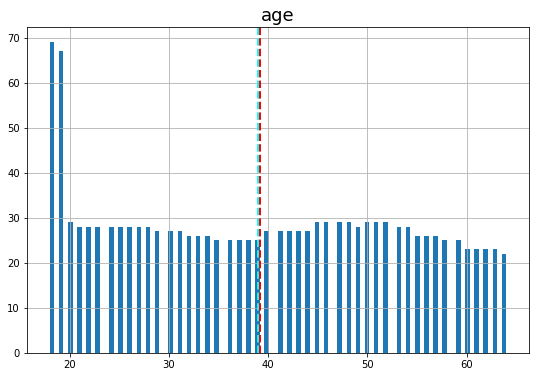

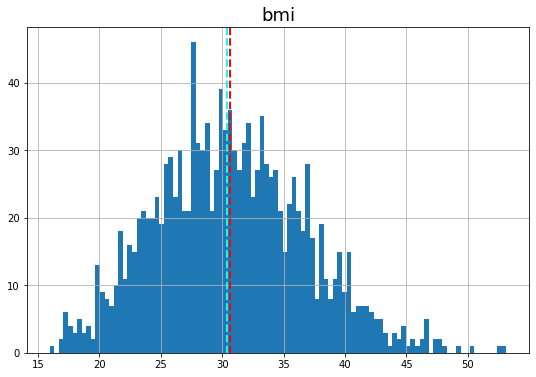

In [15]:
numeric_features = data[["age", "bmi"]]
for col in numeric_features:
    fig=plt.figure(figsize=(9,6))
    ax=fig.gca()
    feature=data[col]
    feature.hist(bins=100, ax=ax)
    ax.axvline(feature.mean(), color="red", linestyle="dashed", linewidth=2)
    ax.axvline(feature.median(), color="cyan", linestyle="dashed", linewidth=2)
    ax.set_title(col, size=18)
plt.show()

- For age, most of the customers are 18–19 years old. The distribution looks like a uniform distribution.
- For BMI, most of people have BMI between 27 -34. The distribution seems like a normal distribution.

**Univariate Analysis for categorical variables**

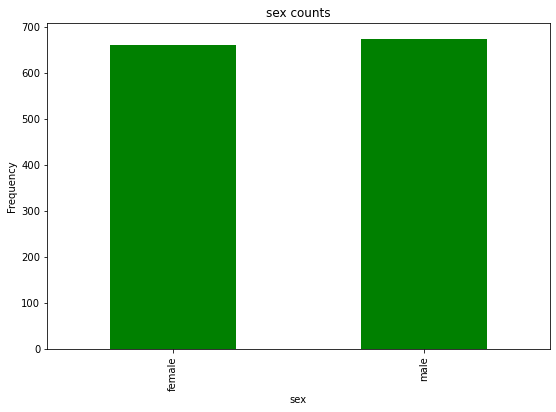

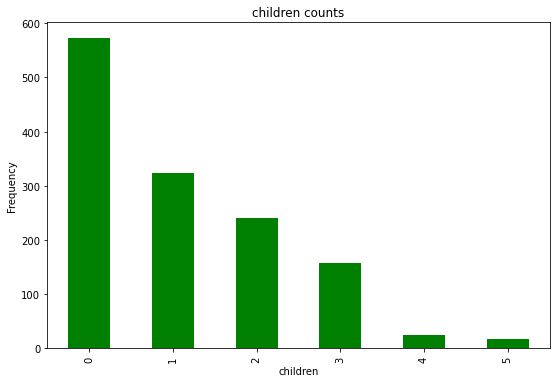

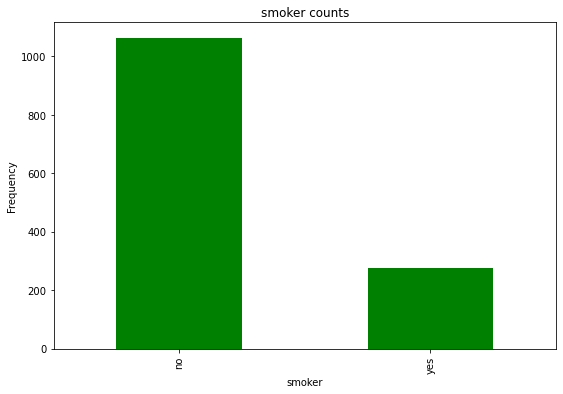

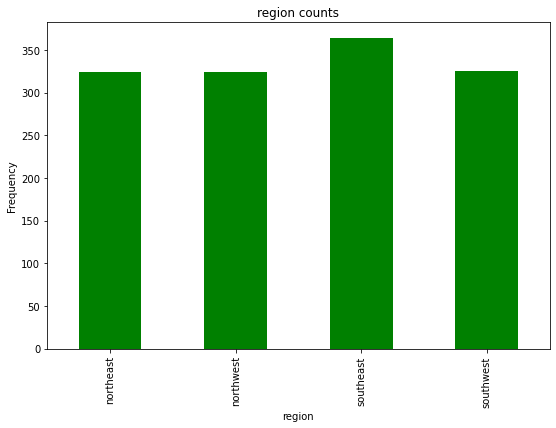

In [16]:
categorical_features = data[["sex", "children", "smoker", "region"]]
for col in categorical_features:
    fig=plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = data[col]
    counts = data[col].value_counts().sort_index()
    counts.plot.bar(ax = ax, color="green")
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()


- Female and Male customers have almost the same number.
- The majority of the customers do not have any children, few of them have 4 and 5 children.
- The number of no smokers accounts for nearly 75% of the total.
- All four regions are almost equally distributed. The number of people from the southeast is slightly more than others.

## 5.2 Bivariate Analysis

For the numeric features, we can create scatter plots that show the intersection of feature and label values. We can also calculate the correlation statistic to quantify the apparent relationship.

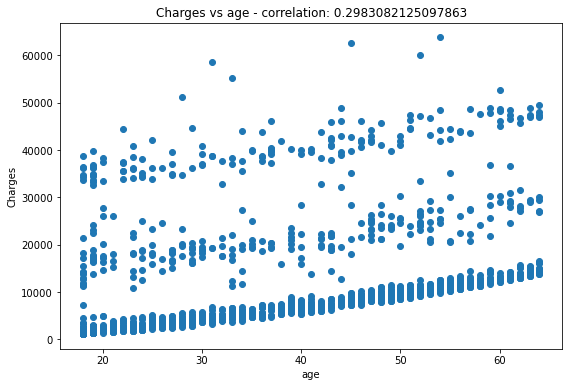

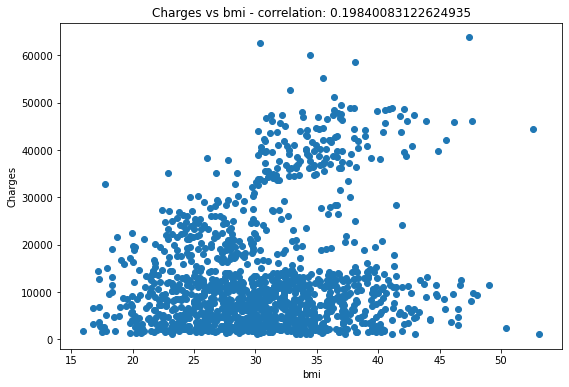

In [17]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['charges']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Charges')
    ax.set_title('Charges vs ' + col + ' - correlation: ' + str(correlation))
plt.show()

- There is a weak positive relationship between age and charges values, as age increases charges also slightly increase.
- Charges and BMI seem have very weak positive relationship. 

Now let's compare the categorical features to the label. We'll do this by creating box plots that show the distribution of charges for each category.

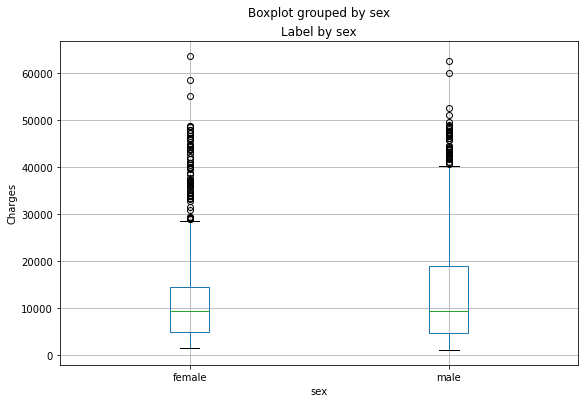

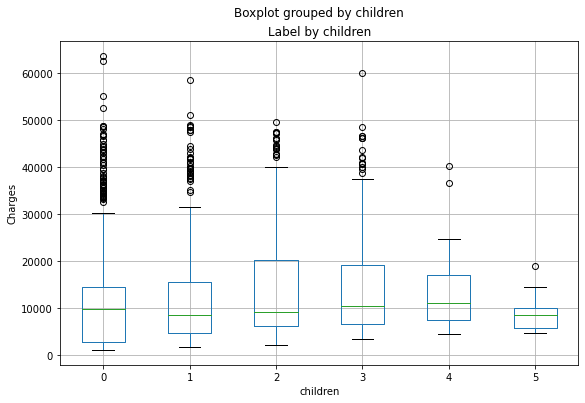

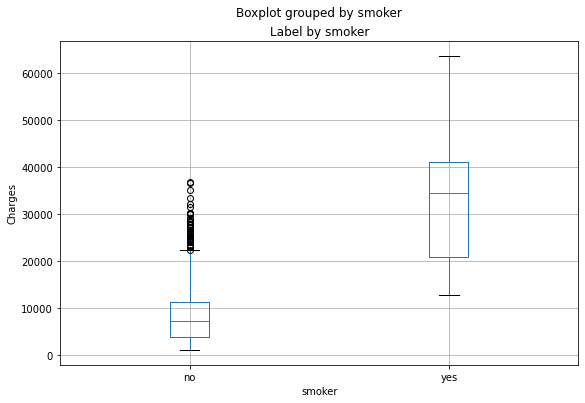

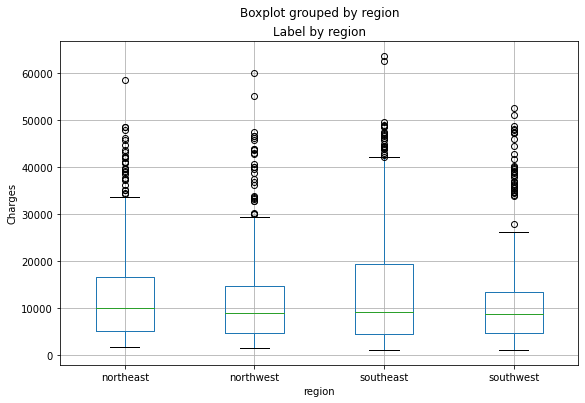

In [18]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    data.boxplot(column = "charges", by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Charges")
plt.show()

- The clearest difference is charges for not smoker and smoker people. Smoking people have to pay more than not smoking people. 
- The cost of insurance for male is little higher than for female. 
- There is not big difference between charges and customers having no or some kids and regions. 

### 5.3 Multivariate Analysis

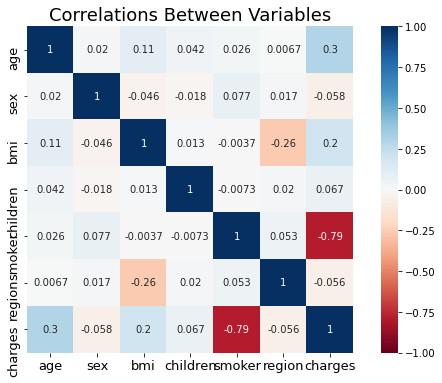

In [62]:
#Heatmap method shows us the relationship between numeric variables.
plt.figure(figsize = (10,6))
sns.heatmap(data.corr(),annot=True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=-1)
plt.title('Correlations Between Variables',size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

- The heatmap shows us there is a correlation between age and charges. As the age increases insurance charges also increase or vice versa.
- There is a strongest correlation between smoker and charges.

- There is a weak correlation between BMI and charges.

- There is almost no relationship between children and charges.

## 6. Building a regression model

**Data Preprocessing** 

From our prior step of descriptive analysis, we can see that the data is made up of two forms: Numerical and Categorical. Building a model with categorical data is hard but not impossible. For simplicity, we proceed to convert categorical data into numerical data. 

In [23]:
# encoding sex column
data.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# encoding smoker column
data.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

# encoding region column
data.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [24]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


**Separate features and label and split data for training and validation**

In [48]:
X, y = data[["age", "sex", "bmi", "children", "smoker", "region"]].values, data["charges"].values
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print("Training set: %d rows\nTesting set: %d rows"%(X_train.shape[0], X_test.shape[0]))

Training set: 935 rows
Testing set: 402 rows


In [49]:
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[19.     1.    27.9    0.     0.     1.   ]
 [18.     0.    33.77   1.     1.     0.   ]
 [28.     0.    33.     3.     1.     0.   ]
 [33.     0.    22.705  0.     1.     3.   ]
 [32.     0.    28.88   0.     1.     3.   ]
 [31.     1.    25.74   0.     1.     0.   ]
 [46.     1.    33.44   1.     1.     0.   ]
 [37.     1.    27.74   3.     1.     3.   ]
 [37.     0.    29.83   2.     1.     2.   ]
 [60.     1.    25.84   0.     1.     3.   ]]

Labels:
[16884.924    1725.5523   4449.462   21984.47061  3866.8552   3756.6216
  8240.5896   7281.5056   6406.4107  28923.13692]


**Model Training**

In [50]:
# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


**Evaluate the Trained Model**

Now that we've trained the model, we can use it to predict personal charges for the features we held back in our validation dataset. Then we can compare these predictions to the actual label values to evaluate how well (or not!) the model is working.

In [51]:


y_pred = model.predict(X_test)

print('Predicted labels: ', np.round(y_pred,2)[:5])
print('Actual labels   : ' ,np.round(y_test,2)[:5])

Predicted labels:  [ 5011.47  9436.72 10830.4  26036.71  7198.05]
Actual labels   :  [ 1633.96  8547.69  9290.14 32548.34  9644.25]


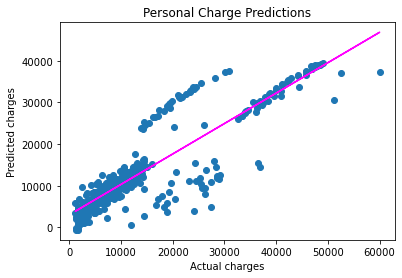

In [59]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, y_pred)
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Personal Charge Predictions')
# overlay the regression line
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [53]:
# Display metrics
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)


MSE: 38621681.603660636
RMSE: 6214.634470639495
R2: 0.7641561622563828


The model can explain more than 75% variance between predicted and actual labels. 

**Building a Predictive System**

In [58]:
# Create a numpy array containing a new observation 
X_new = np.array([[31,1,25.74,0,1,0]]).astype('float64') ## 31,female,25.74,0,no,southeast
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = model.predict(X_new)
print('The insurance cost of a new customer in USD: {}'.format(np.round(result[0], 2)))

New sample: [31.0, 1.0, 25.74, 0.0, 1.0, 0.0]
The insurance cost of a new customer in USD: 4017.25
